In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('dataset.csv')
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


In [13]:
import math

# Total number of rounds (users)
N = 10000

# Number of ads (arms)
d = 10

# Tracking total rewards (prizes) and clicks per ad
prizes = [0] * d      
clicks = [0] * d      


sum = 0

# List to store which ad was selected in each round
selected = []


for n in range(1, N):  
    ad = 0             
    max_ucb = 0        
    
    # Loop over each ad to compute UCB
    for i in range(0, d):
        if clicks[i] > 0:
            # Calculate average reward for ad i
            average = prizes[i] / clicks[i]
            
            # Calculate confidence interval (delta) for ad i
            delta = math.sqrt( (3/2) * math.log(n) / clicks[i] )
            
            # Compute UCB value
            ucb = average + delta
        else:
            # Set very high UCB to ensure this ad is selected at least once
            ucb = N * 200
        
        # Select the ad with the highest UCB
        if max_ucb < ucb:
            max_ucb = ucb
            ad = i
    
 
    selected.append(ad)
    
    # Update clicks and rewards
    clicks[ad] += 1
    prize = dataset.values[n, ad]  
    prizes[ad] += prize
    sum += prize  


Sum of Prize
2231


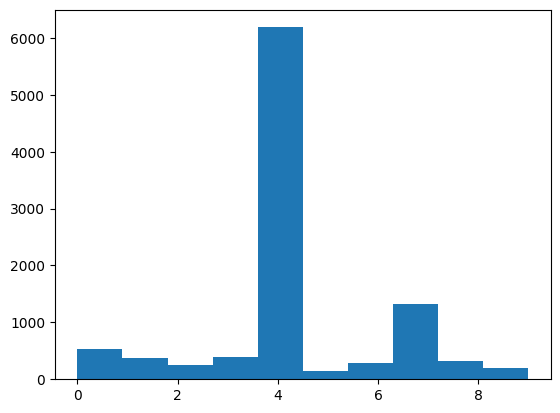

In [14]:
print('Sum of Prize')
print(sum)
plt.hist(selected)
plt.show()